In [1]:
import sys

!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} pyodbc
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\csorensen\.conda\envs\test

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nltk-3.4.3                 |           py37_0         1.7 MB
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following packages will be REMOVED:

  mkl-service-1.1.2-py37hb782905_5

The following packages will be UPDATED:

  nltk                                

In [1]:
#all the imports used in the program

import pandas as pd 
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [3]:
#Grab data from a database

def getData(Server, UID, PWD, Database, query):    
    
    #create a SQL connection based on the given server and database
    sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                              'SERVER='+Server+';' 
                              'UID='+UID+';'
                              'PWD='+PWD+';'
                              'DATABASE='+Database+';' )
    
    #return the data from the given Query and SQL connection,
    #here i hard coded the index so all queries must select examCode
    #for other instances just simply change or remove depending on use
    return pd.read_sql(query, sql_conn, index_col ="examCode")

In [4]:
#establish my server and corresponding database to pull data from
server ='GSDEMO2HOST'
database = 'MClinical'
UID = 'gsanalytics'
PWD = 'G3st@lt'

#this query grabs sectionValues with their corresponding examCode
#does not select examCodes if there is less than 100 section values for the corresponding examCode
#Stores the result in a pandas DataFrame object called data
query = "SELECT examCode, sectionValue FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE ( ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS' ) AND ( ResultSection.sectionValue <> ' ' ) AND ( ResultSection.sectionValue <> ' No diagnosis; performed technical only ' ) AND examCode in ( select top 100 examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE ( ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS' ) AND ( ResultSection.sectionValue <> ' ' ) AND ( ResultSection.sectionValue <> ' No diagnosis; performed technical only ' ) group by examCode order by count(examCode) DESC ) ORDER BY examCode"
data = getData(server, UID, PWD, database, query)

#this query is a unique list of exam codes from the previous query, this will be useful later
#Stored the result in a pandas DataFrame object called unique_labels
query = "SELECT DISTINCT examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE ( ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS' ) AND ( ResultSection.sectionValue <> ' ' ) AND ( ResultSection.sectionValue <> ' No diagnosis; performed technical only ' ) AND examCode in ( select top 100 examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE ( ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS' ) AND ( ResultSection.sectionValue <> ' ' ) AND ( ResultSection.sectionValue <> ' No diagnosis; performed technical only ' ) group by examCode order by count(examCode) DESC ) ORDER BY examCode"
unique_labels = getData(server, UID, PWD, database, query)

#this query is the exact same query as above, just has description tagged onto it, aswell this will be useful later
#Stored the result in a pandas DataFrame object called descriptive_labels
query = "SELECT DISTINCT examCode, description FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE ( ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS' ) AND ( ResultSection.sectionValue <> ' ' ) AND ( ResultSection.sectionValue <> ' No diagnosis; performed technical only ' ) AND examCode in ( select top 100 examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE ( ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS' ) AND ( ResultSection.sectionValue <> ' ' ) AND ( ResultSection.sectionValue <> ' No diagnosis; performed technical only ' ) group by examCode order by count(examCode) DESC ) ORDER BY examCode"
descriptive_labels = getData(server, UID, PWD, database, query)


In [5]:
#removes words that have at one colon somewhere in the middle of two words
#and words that have two colons separated by three words. 

def removeColon(df):
    
    #Word array of words that i will later remove
    bagOfWords = []
    
    #a array of every word in the sectionValue on the given dataframe df
    wordList = df.sectionValue.str.split(expand=True).stack()
    
    for word in wordList:
        colonWord = re.search(r"\w+:\w+:\w+", word)
        if colonWord is None:
            colonWord = re.search(r"\w+:\w+", word)
        if colonWord is not None:
            if colonWord.group() not in bagOfWords:
                bagOfWords.append(colonWord.group())
    
    #return the updated dataframe sectionValue, only keeping words that are not contained in bagOfWords            
    return df['sectionValue'].apply(lambda x: ' '.join([word for word in x.split() if word not in (bagOfWords)]))

This method is more useful than it looks.

You pass in a pandas DataFrame and tweak it.

First, i create a empty list called bagOfWords

The next line seemes confusing but bassically what I am doing here is taking every word from the sectionValue column and creating a list in which each row only contains one word. This helps with the iterative process. I store the result of this into WordList(approx 1.4 million words)

Next, i iterate through every word in the wordList in a for loop.

let me explain how the search process works and what words i am looking to add to my bagOfWords
1. How does the search processWork?
    1. I use Regex(regular expression) to do my searching for me which is on a character by character basis
2. What kind of words am i looking for?
    1. \w+:\w+ and \w+:\w+:\w+
        1. \w searches for any character in the form [a-zA-Z0-9]
        2. \+ searches for the previous search condition until the end of the word. 
        3. : specifies that i want a colon 
        4. putting it all together 
            1. \w+:\w+ searches for a character in the form [a-zA-Z0-9] for any amount of characters in that form until it hits a colon : in which then it does the same \w+ until the end of the word.
            2. \w+:\w+:\w+ is the same as above just has two colons i hope you get the picture..
            
     
Since i am searching for two different types of words i need to search two different times for every word in wordList.

I search the word to see if it matches the pattern of having three words separated by 2 colons, this returns a match object which i store in colonWord.

if the word isnt found in the search it returns None, so i check if colonWord is None. If it is i search for the different type of word and store that searches result into colonWord.

After that process is done i finally check to see if either of my searches came back true(not None)

If they do i use colonWord.group() function to grab just the string(word) that it found.

Then Check the bagOfWords to see if the word i found is already in it. 

If the word is already in it I move onto the next word in the wordList.

if it is not, i simply  add it and move to the next word as well. 

Finally once i have scanned all words and created my bagOfWords that is a unique list i remove those words from the sectionValue column of the Data. 

what the last line in the funtion is doing is recreating my column sectionValue, but only keeping words that are NOT in bagOfWords.

Once that is done i return the new column of sectionValue. 

In [6]:
#here i wanted to remove punctuation from the column sectionValue in my pandas dataFrame
#i replace every character that matches with one of the following below with nothing.

def removePunctuation(df1):
    df1['sectionValue'] = df1['sectionValue'].str.replace(',', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('.', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('?', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('/', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('/', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('+', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('-', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('=', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('_', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace(')', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('(', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('*', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('&', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('^', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('%', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('$', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('#', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('@', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('!', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('>', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('<', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('[', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace(']', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('{', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('}', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('|', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace(':', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace(';', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('\'', '')
    df1['sectionValue'] = df1['sectionValue'].str.replace('\"', '')
    return df1
    

In [7]:
def removeStopWords(df):
    nltk.download('stopwords')
    #stopWords are words that have relatively no meaning to any actual data
    #we dont want that here so lets remove them
    stop = stopwords.words('english')
    
    # add custom stopWords 
    stop = addStopWords(stop)
    
    # add this if you want to remove words that are smaller than size two
    # change the size to whatever you like 
    
    #df['sectionValue'] = df['sectionValue'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))
    
    #returning the new sectionValue to the Datafram with words that are not in the StopWords
    return df['sectionValue'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [8]:
#adding my own custom stopWords
#super simple to add as you can see 
#modify as needed!

def addStopWords(stop):
    stop.append('-')
    stop.append('a')
    stop.append('b')
    stop.append('c')
    stop.append('d')
    stop.append('e')
    stop.append('f')
    stop.append('g')
    stop.append('h')
    stop.append('i')
    stop.append('j')
    stop.append('k')
    stop.append('l')
    stop.append('m')
    stop.append('n')
    stop.append('o')
    stop.append('p')
    stop.append('q')
    stop.append('r')
    stop.append('s')
    stop.append('t')
    stop.append('u')
    stop.append('v')
    stop.append('w')
    stop.append('x')
    stop.append('y')
    stop.append('z')
    stop.append('no')
    stop.append('see')
    stop.append('two')
    stop.append('0')
    stop.append('1')
    stop.append('2')
    stop.append('3')
    stop.append('4')
    stop.append('5')
    stop.append('6')
    stop.append('7')
    stop.append('8')
    stop.append('9')
    return stop

In [9]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\csorensen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#change the case of all the words to lower case so there is no case sensitivity.
data['sectionValue'] = data['sectionValue'].str.lower()

#call the removeColon function to remove words with a colon or mulitple colons in the middle of the word
data['sectionValue'] = removeColon(data)

#call the removePuncuation code, notice how i did this after the removeColon function.
#it is important that we call this after the removeColon Function because this would remove colons
#from words we want to remove, and then the remove colon function would never find anything because there is no colons. 
data = removePunctuation(data)

#call the removeStopWords function to remove words that have no meaning.
data['sectionValue'] = removeStopWords(data)

data['sectionValue'] = data.sectionValue.apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csorensen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def generateWordIndex(df):
    
    # take the data frame and create a word count of all words in the sectionValue and return the series object(word, frequency)
    return df.sectionValue.str.split(expand=True).stack().value_counts()

In [15]:
#generate the report for the specific label(examCode)

def generateReport(word_index, label):
    
    #print the top 25 words
    print(word_index[:25])
    
    #create an array from 1 to however many words you wish to display
    #:25 grabs the first 25 in an array in python, 25: grabs the last 25 in an array
    x = np.arange(len(word_index[:25]))
    
    #at first every bar is labeled by a number, with the corresponding frequency
    # this gets changed 
    plt.bar(x, height= word_index.values[:25])
    
    #as promised we change the bar name from a index number to its actual number
    #given by the index of the word_index, again only the first 25 so that it matches each number
    #to the corresponding word
    plt.xticks(x, word_index.index[:25], rotation=80)
    
    #this is where it was nice having the exam code be the index for all of my dataframes.
    #here i create the title by the examCode, then the description of the cooresponding examCode
    plt.title(label + "\n" + descriptive_labels.description[label])
    plt.ylabel("Frequency")
    plt.show()
    
    #we clear the plot after every call so that if the function is to be called again it is good to go
    plt.clf()
    
    

*APPO
A. APPENDIX, OTHER THAN INCIDENTAL 

appendix            713
acute               648
appendicitis        598
appendectomy        436
periappendicitis    305
benign              133
serositis           108
suppurative          98
tumor                70
negative             62
excision             61
evidence             51
inflammation         47
appendiceal          41
perforation          38
neoplasia            36
margin               35
malignancy           33
cm                   32
obliteration         32
transmural           31
fibrous              30
identify             30
dysplasia            29
atypia               28
dtype: int64


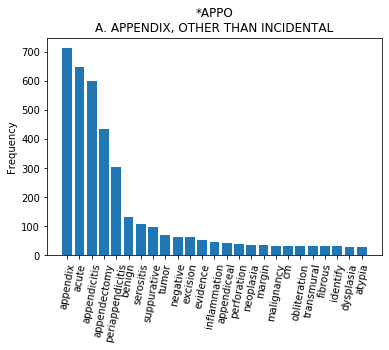



*COL-P
A. COLON POLYP 

polyp           504
colon           456
adenoma         374
dysplasia       338
tubular         318
malignancy      271
highgrade       263
biopsy          260
fragment        209
cm              203
polypectomy     185
evidence        175
negative        166
hyperplastic    138
ascend          104
multiple         95
cecum            76
lymphoid         62
adenomatous      59
colonic          56
benign           51
aggregate        48
one              46
transverse       44
identify         44
dtype: int64


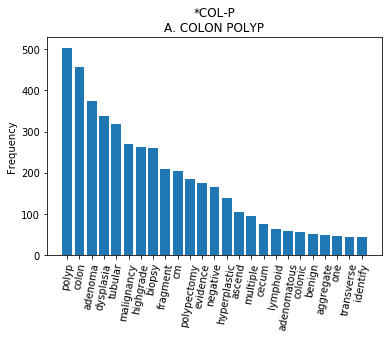



*GALLB
A. GALLBLADDER 

gallbladder        1167
cholecystitis       895
cholelithiasis      840
chronic             808
cholecystectomy     801
acute               253
cholesterolosis     243
benign              184
mild                145
evidence            128
node                113
lymph               112
malignancy          107
neoplasia            96
negative             89
dysplasia            85
excision             70
mucosal              68
atypia               57
identify             49
focal                44
change               39
gangrenous           37
tumor                34
mix                  33
dtype: int64


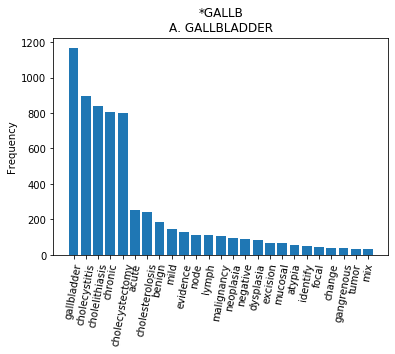



*PLAC
A. PLACENTA, 3RD TRIMESTER 

placenta          1323
umbilical          996
cord               990
mild               902
show               790
acute              762
inflammatory       708
villous            665
chorionic          644
trivascular        620
change             601
maturation         584
term               538
fetal              536
deposition         505
villus             477
placental          472
meconium           469
interpretation     448
membrane           410
appropriate        398
moderate           384
inflammation       347
gram               319
maternal           310
dtype: int64


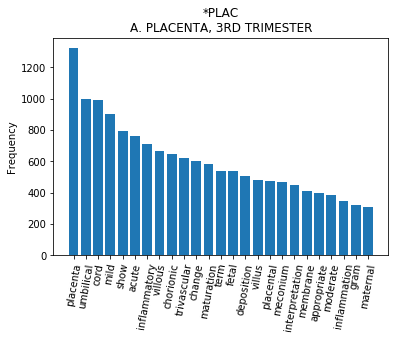



ANT-BX
A. ANTRUM/ANTRAL BIOPSY 

negative        5288
biopsy          4671
mucosa          3235
gastric         2905
dysplasia       2849
antrum          2696
metaplasia      2682
intestinal      2279
chronic         2249
malignancy      2000
stomach         1942
pylorus         1773
inflammation    1572
mild            1347
reactive        1339
stain           1274
helicobacter    1202
gastritis       1006
esophagus        988
benign           986
gastropathy      915
organism         903
antral           835
polyp            769
squamous         767
dtype: int64


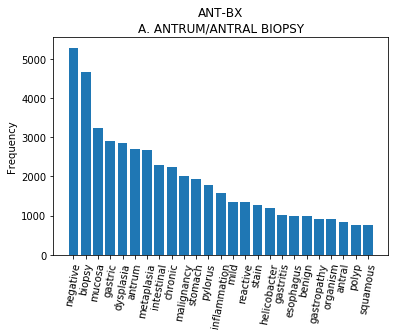



APPO
A. APPENDIX, OTHER THAN INCIDENTAL 

appendix            2570
acute               2280
appendicitis        2165
appendectomy        2029
periappendicitis     983
serositis            424
suppurative          358
inflammation         271
negative             221
tumor                208
benign               203
perforation          168
transmural           166
focal                166
fibrous              128
obliteration         122
excision             121
margin               110
tip                  106
appendiceal          104
fecalith              94
periappendiceal       92
necrotizing           92
consistent            88
evidence              88
dtype: int64


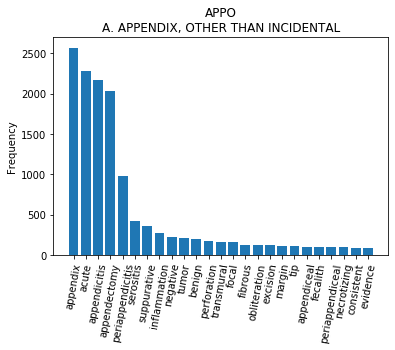



BEL-PROS6BX
F. RIGHT APEX PROSTATE BIOPSY 

prostatic         4981
tumor             4586
tissue            3919
benign            2823
leave             2231
right             2224
core              1857
apex              1483
base              1482
mid               1480
present           1347
adenocarcinoma    1282
prostate          1227
invasion          1218
perineural        1211
gleason           1195
involve           1178
quantitation      1166
score             1124
longest           1090
confluent         1076
length            1061
mm                1059
identify           958
biopsy             928
dtype: int64


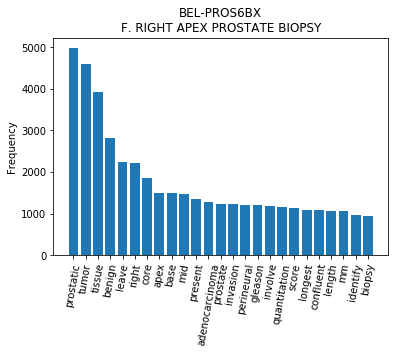



BONEF-O
A. BONE FRAGMENTS, OTHER THAN PATHOLOGIC FRACTURE 

bone              839
cartilage         491
degenerative      419
feature           383
right             367
knee              351
leave             333
content           307
tissue            209
present           153
benign            123
change            118
element           116
hematopoietic     115
negative          115
unremarkable      106
inflammation       99
malignancy         94
osteoarthritis     94
excision           88
resection          85
chronic            83
consistent         82
fragment           81
soft               73
dtype: int64


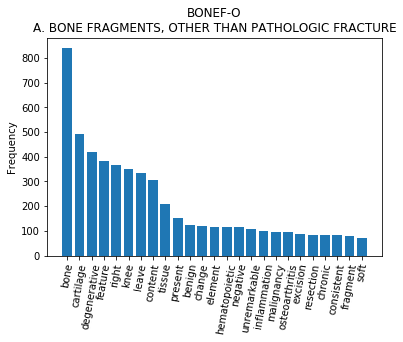



CL-ANT-BX
A. ANTRUM/ANTRAL BIOPSY 

negative        3097
biopsy          2704
metaplasia      1990
dysplasia       1928
chronic         1630
esophagus       1434
mucosa          1422
intestinal      1209
inflammation    1133
esophagitis     1053
antrum          1048
stomach         1033
gastric          985
distal           949
pylorus          904
helicobacter     888
barretts         853
atrophy          840
mild             793
cell             781
goblet           778
reactive         663
squamous         572
involve          545
comment          538
dtype: int64


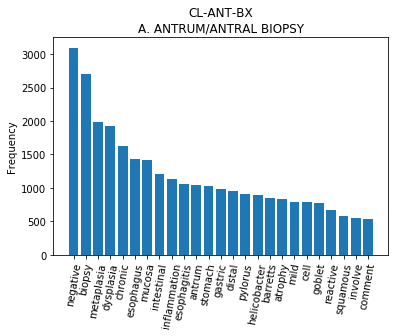



CL-COL-P
A. COLON POLYP 

colon           5684
polypectomy     4696
adenoma         4177
polyp           3510
tubular         3465
hyperplastic    1520
biopsy          1292
descend         1140
ascend          1138
dysplasia       1074
transverse       948
sigmoid          923
highgrade        821
colonic          720
serrate          706
sessile          659
mucosa           617
flexure          602
negative         590
cecum            584
polypadenoma     407
hepatic          401
benign           361
rectum           306
one              267
dtype: int64


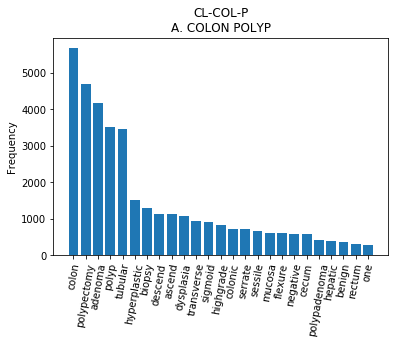



CL-COLBX
A. COLON BIOPSY 

colon           1951
biopsy          1629
negative        1196
mucosa          1160
colonic         1142
colitis         1047
chronic          751
dysplasia        647
random           645
acute            547
polyp            519
microscopic      517
inflammatory     499
polypectomy      470
benign           432
adenoma          388
sigmoid          359
normal           339
active           321
abnormality      320
comment          313
hyperplastic     303
significant      278
tubular          264
disease          244
dtype: int64


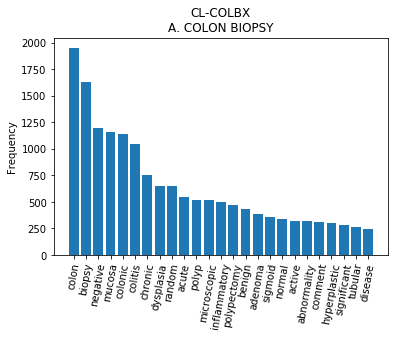



CL-DUOBX
A. DUODENAL BIOPSY 

negative        4130
biopsy          3949
mucosa          2611
dysplasia       2031
metaplasia      1991
inflammation    1926
chronic         1798
esophagus       1307
gastric         1305
intestinal      1211
duodenum        1208
portion         1103
second          1098
stomach         1061
esophagitis      953
pylorus          919
helicobacter     919
duodenal         913
parasite         898
distal           879
barretts         876
atrophy          871
cell             868
comment          855
mild             844
dtype: int64


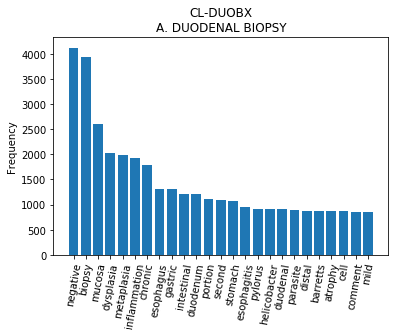



CL-SIG-P
A. SIGMOID POLYP 

colon           888
polyp           804
polypectomy     744
sigmoid         682
hyperplastic    543
adenoma         386
tubular         297
biopsy          182
dysplasia        93
negative         91
colonic          90
mucosa           89
rectum           75
highgrade        66
descend          45
benign           41
rectal           32
mildly           32
abnormality      30
significant      30
comment          29
ascend           29
md               26
isaac            26
pathologist      26
dtype: int64


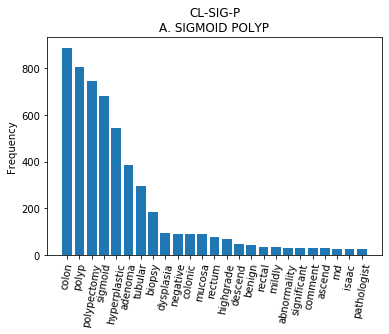



COL-P
A. COLON POLYP 

polyp           18362
colon           15979
adenoma         13269
tubular         11432
biopsy          10360
polypectomy      7652
fragment         7389
hyperplastic     4887
dysplasia        4599
negative         4416
ascend           4316
transverse       4023
mucosa           3087
descend          2889
colonic          2787
malignancy       2662
highgrade        2471
sigmoid          2200
cecum            2041
benign           1984
case             1722
review           1722
dictate          1711
cm               1642
md               1591
dtype: int64


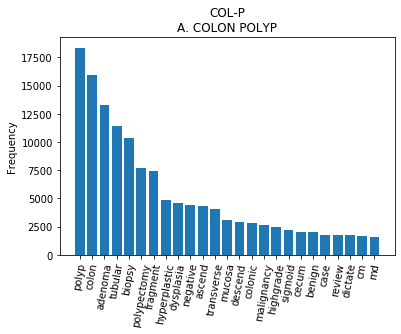



COL-P:KNB1TCC.UXXX7JOGFDWKIQ
COL-P,COL-P 

polyp           1640
colon           1423
adenoma         1309
tubular         1125
biopsy           842
polypectomy      696
fragment         622
dysplasia        420
ascend           416
negative         345
transverse       334
hyperplastic     298
cm               281
descend          270
highgrade        244
malignancy       242
serrate          175
cecum            169
mucosa           168
colonic          166
sessile          157
review           145
dictate          144
case             144
md               144
dtype: int64


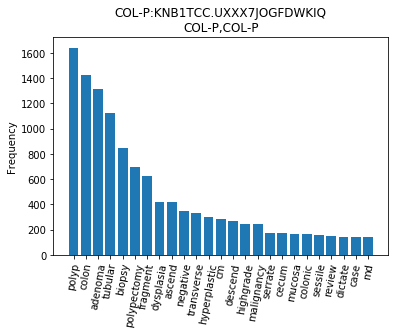



COLBX
A. COLON BIOPSY 

biopsy          6609
colon           5963
negative        4940
colitis         3664
mucosa          3582
dysplasia       3439
colonic         3155
malignancy      1695
benign          1664
polyp           1551
active          1503
fragment        1497
chronic         1438
random          1404
granuloma       1204
adenoma         1195
diagnostic      1175
abnormality     1166
sigmoid         1164
microscopic      999
tubular          972
change           965
ascend           855
hyperplastic     832
bowel            830
dtype: int64


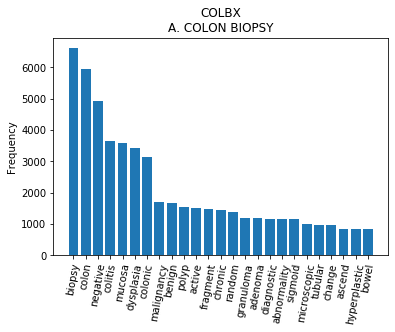



CON-SR
A. CONSULT SLIDE REVIEW 

biopsy                1266
review                1190
case                  1162
skin                  1132
dermatopathologist    1077
dictate               1059
comment                908
margin                 890
shave                  828
boardcertified         798
webb                   787
alden                  786
present                624
lateral                603
leave                  556
right                  510
nevus                  477
cell                   417
deep                   309
find                   307
md                     294
compound               290
atypia                 287
board                  286
mancong                283
dtype: int64


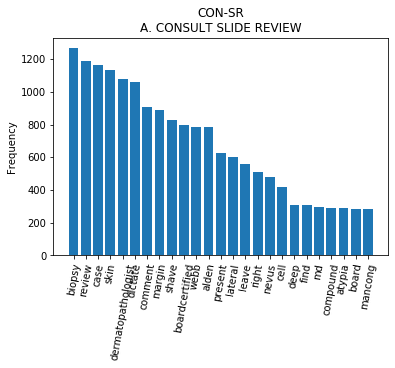



CXBX
A. CERVICAL BIOPSY 

squamous           1709
biopsy             1640
dysplasia          1541
endocervical       1339
cervix             1179
cin                1030
intraepithelial     807
lesion              757
benign              748
fragment            712
grade               692
comment             679
negative            590
malignancy          543
cervical            523
mucosa              495
epithelium          490
identify            452
endocervix          445
mild                434
curettings          424
low                 423
glandular           402
tissue              398
oclock              383
dtype: int64


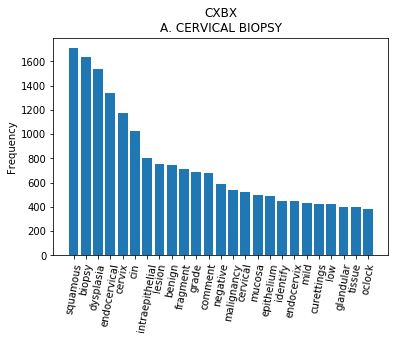



CXBX12
A. 12 O'CLOCK CERVICAL BIOPSY 

biopsy             1602
squamous           1487
dysplasia          1390
cervix             1270
endocervical        966
oclock              947
cin                 870
intraepithelial     666
benign              649
12                  640
lesion              615
negative            582
grade               520
mild                502
mucosa              494
comment             461
cervical            460
fragment            459
malignancy          392
epithelium          367
identify            346
low                 342
endocervix          317
curettings          305
tissue              305
dtype: int64


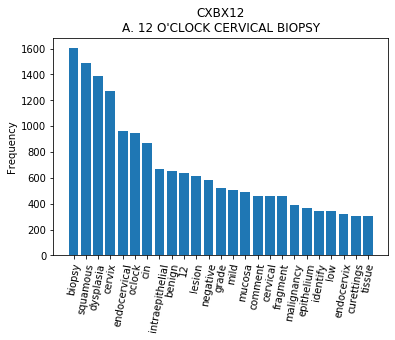



CXBX6
A. 6 O'CLOCK CERVICAL BIOPSY 

biopsy             1538
squamous           1395
dysplasia          1378
cervix             1154
oclock             1005
endocervical        976
cin                 913
benign              642
negative            579
intraepithelial     563
lesion              511
cervical            504
mucosa              477
mild                471
fragment            437
grade               389
malignancy          388
comment             363
epithelium          342
curettings          319
endocervix          315
identify            284
zone                278
tissue              268
transformation      263
dtype: int64


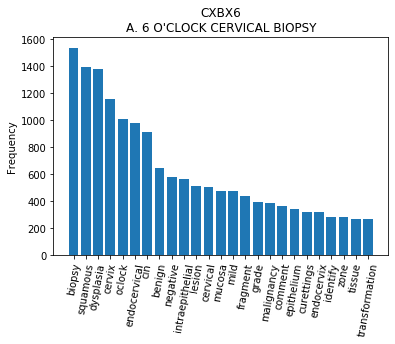



CXCONE
A. CERVICAL CONE BIOPSY(3) 

dysplasia          2485
squamous           1657
endocervical       1654
leep               1472
cin                1427
margin             1306
cervix             1278
negative            963
lesion              945
intraepithelial     922
grade               692
excision            576
highgrade           555
ectocervical        520
benign              517
biopsy              478
mucosa              445
focal               442
identify            431
present             403
cone                403
high                389
mild                380
comment             379
tissue              367
dtype: int64


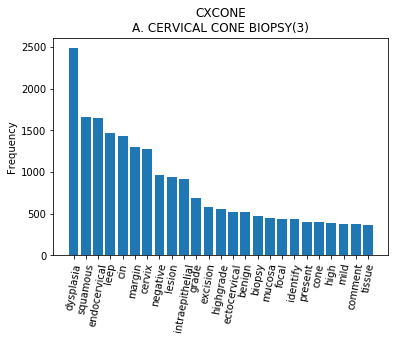



CXPOLYP
A. CERVICAL POLYP 

polyp           2598
endocervical    1346
benign          1149
cervical        1077
biopsy           723
malignancy       676
dysplasia        631
cervix           538
negative         463
polypectomy      354
squamous         343
glandular        337
atypia           311
fragment         277
identify         245
evidence         216
endometrial      207
inflammation     194
metaplasia       189
without          175
inflame          174
excision         167
chronic          161
endometrium      143
tissue           137
dtype: int64


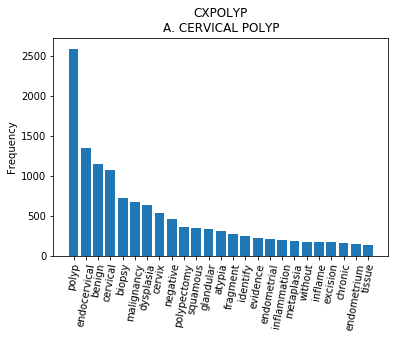



CYST
A. CYST 

cyst                  874
excision              369
tissue                363
benign                357
right                 316
leave                 302
soft                  230
skin                  176
case                  166
review                166
dictate               165
md                    156
dermatopathologist    153
boardcertified        153
finger                131
ganglion              126
peter                 122
herreid               122
inflammation          112
inclusion             110
consistent            102
change                 99
malignancy             98
epidermal              97
negative               91
dtype: int64


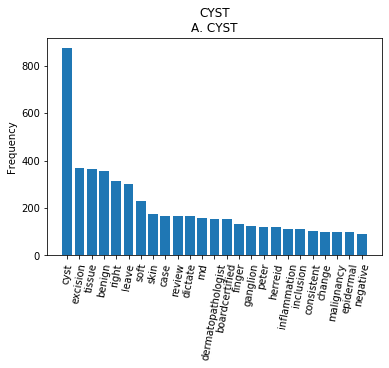



DUOBX
A. DUODENAL BIOPSY 

biopsy             7763
negative           6717
mucosa             5440
dysplasia          2754
duodenal           2597
duodenum           2458
gastric            2076
malignancy         2066
metaplasia         1992
chronic            1982
benign             1808
inflammation       1782
abnormality        1782
intestinal         1701
diagnostic         1604
colon              1555
fragment           1258
stomach            1208
intraepithelial    1192
mild               1164
pylorus            1126
esophagus          1098
celiac             1020
polyp               982
villous             980
dtype: int64


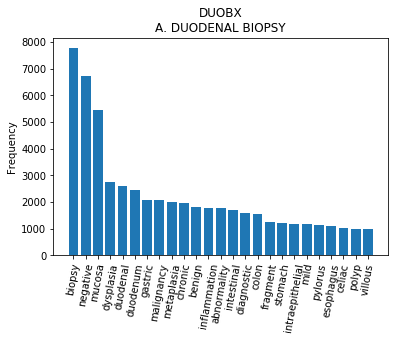



ECC
A. ENDOCERVICAL CURETTINGS 

endocervical       4923
squamous           3975
dysplasia          3762
biopsy             2457
benign             2410
fragment           2395
negative           2044
curettings         1933
cervix             1828
epithelium         1728
endocervix         1710
cin                1702
malignancy         1680
mucosa             1491
intraepithelial    1356
comment            1327
tissue             1261
curettage          1252
lesion             1250
glandular          1223
grade              1190
identify           1109
oclock             1085
atypia             1021
mild                972
dtype: int64


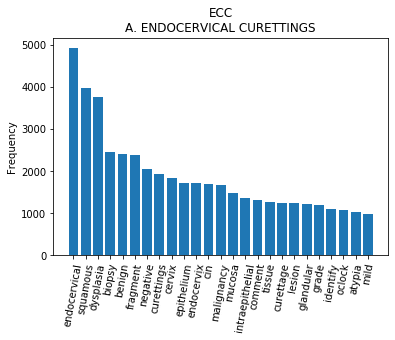



EMBX1
A. ENDOMETRIAL BIOPSY 

endometrium      16799
endometrial      13615
biopsy           13292
hyperplasia       8646
malignancy        7042
atypia            6969
negative          6121
benign            5882
proliferative     5780
fragment          4575
polyp             3397
cytologic         3225
without           2760
glandular         2374
identify          2283
endocervical      2267
secretory         2117
stromal           1912
tissue            1791
breakdown         1729
change            1651
epithelium        1636
strip             1526
evidence          1454
weakly            1424
dtype: int64


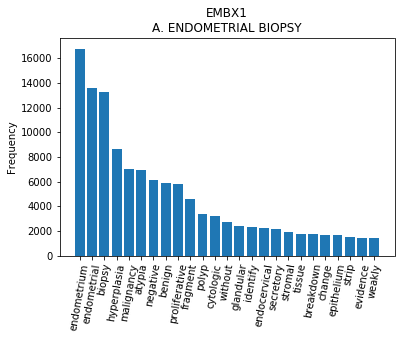



EMC1
A. ENDOMETRIAL CURETTINGS, 1 BLOCK 

endometrium      2207
endometrial      1919
fragment         1199
benign           1186
curettings       1129
hyperplasia      1056
negative         1050
atypia           1004
malignancy        895
proliferative     895
polyp             855
curettage         567
endocervical      517
tissue            379
secretory         341
without           325
change            309
glandular         293
stromal           287
identify          268
squamous          268
disorder          257
cytologic         250
feature           249
uterine           240
dtype: int64


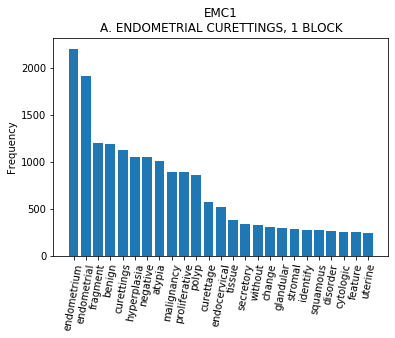



ESBX
A. ESOPHAGEAL BIOPSY 

biopsy          4482
esophagus       3850
negative        3719
mucosa          3330
dysplasia       2859
metaplasia      2205
squamous        2040
intestinal      1353
esophagitis     1325
malignancy      1304
barretts        1294
chronic         1293
distal          1219
inflammation    1183
esophageal      1095
cell             910
reflux           877
change           862
goblet           844
gastric          824
reactive         817
cm               725
mild             720
eosinophil       686
lower            642
dtype: int64


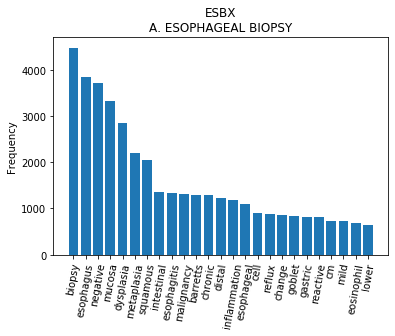



FAL
A. FALLOPIAN TUBES, BILATERAL 

tube             1158
fallopian        1104
bilateral         670
segment           398
benign            270
section           263
cross             249
right             234
leave             232
complete          226
identify          216
transect          216
completely        178
salpingectomy     151
oviduct           132
resection         125
abnormality       123
segmental         123
cyst              117
unremarkable      105
paratubal          96
significant        92
diagnostic         89
tubal              77
full               69
dtype: int64


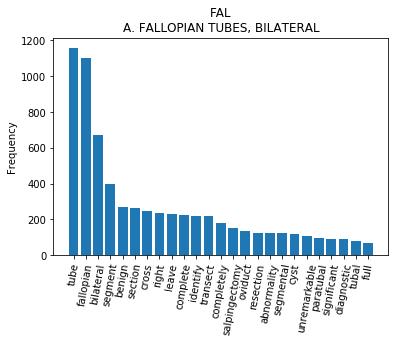



FAL2-ST
A. FALLOPIAN TUBES SEGMENT, (SPECIFY RT OR LT) STERILIZATION 

tube             1716
fallopian        1684
complete          665
leave             604
right             600
segment           471
section           465
cross             442
sterilization     293
unremarkable      279
salpingectomy     266
transection       234
identify          189
transect          147
benign            138
tubal             135
bilateral         129
abnormality       123
ligation          107
part               99
full               96
completely         94
excision           90
lumen              89
diagnostic         85
dtype: int64


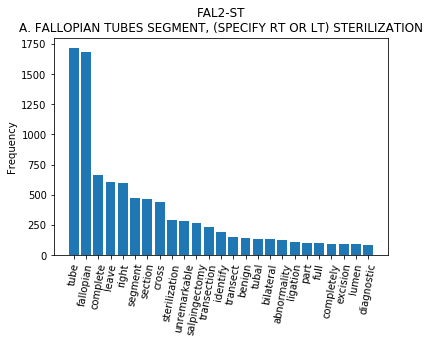



GALLB
A. GALLBLADDER 

gallbladder        6002
cholecystitis      5126
chronic            5034
cholecystectomy    4880
cholelithiasis     3724
cholesterolosis    1244
acute               984
mild                885
benign              776
negative            597
node                543
lymph               542
calculous           372
malignancy          367
change              357
gross               339
inflammation        315
focal               313
mucosal             310
dysplasia           276
identify            259
excision            246
reactive            237
review              221
dictate             221
dtype: int64


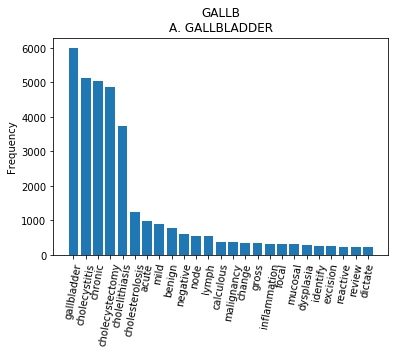



GANGC
A. GANGLION CYST 

ganglion              560
cyst                  549
tissue                408
leave                 316
wrist                 316
excision              309
right                 305
soft                  300
benign                294
review                182
case                  182
dictate               182
dermatopathologist    178
md                    170
boardcertified        169
peter                 148
herreid               148
finger                128
consistent            109
change                 98
foot                   83
dorsal                 75
feature                67
adjacent               66
granulomatous          65
dtype: int64


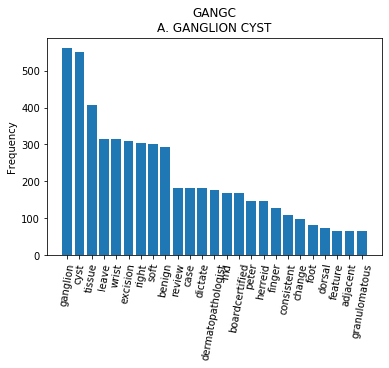



GBX
A. GASTRIC BIOPSY(2) 

negative        3914
biopsy          3861
gastric         2999
mucosa          2725
metaplasia      1943
chronic         1913
dysplasia       1905
intestinal      1670
helicobacter    1411
inflammation    1213
pylorus         1142
mild            1082
benign          1012
gastritis        971
malignancy       955
stomach          869
organism         783
stain            774
reactive         745
change           719
fragment         656
colon            644
esophagus        633
polyp            605
focal            572
dtype: int64


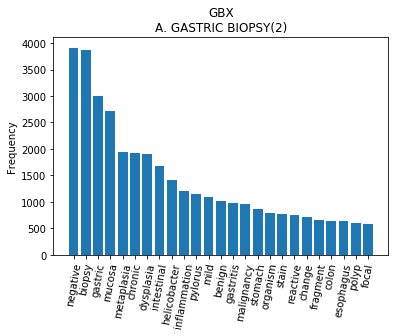



GEJUNC
A. GE JUNCTION 

biopsy              1569
negative            1505
mucosa              1473
junction            1239
dysplasia           1112
metaplasia          1064
chronic              769
gastroesophageal     669
intestinal           664
ge                   642
squamous             630
inflammation         621
gastric              500
malignancy           471
change               457
cell                 425
mild                 421
goblet               413
barretts             392
benign               356
esophagus            346
reflux               338
esophagitis          321
reactive             319
colon                215
dtype: int64


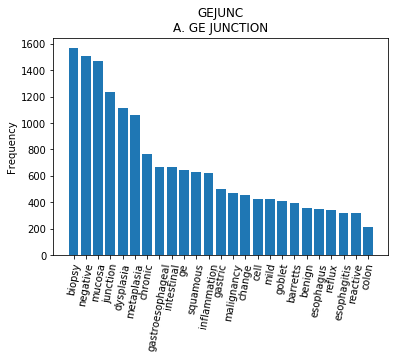



HEMO
A. HEMORRHOIDS 

hemorrhoid          1312
tissue               488
hemorrhoidectomy     419
benign               400
mucosa               324
hemorrhoidal         299
malignancy           287
dysplasia            270
consistent           269
squamous             258
dilate               219
anorectal            208
negative             161
anal                 157
inflammation         155
phlebectasia         153
soft                 149
associate            140
chronic              136
region               134
focal                125
atypia               124
excision             122
identify             120
vessel               113
dtype: int64


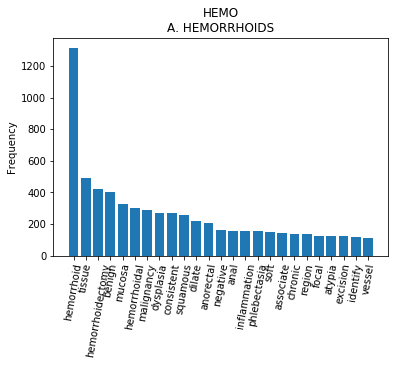



KAD-APPENDIX A
A. APPENDIX-APPENDICITIS 

appendix            927
acute               900
appendectomy        863
appendicitis        830
neoplasia           440
periappendicitis    409
negative            327
evidence            240
serositis           168
mark                155
present             111
benign               71
fecalith             52
inspissate           47
chronic              42
fibrous              38
focal                35
perforation          32
appendiceal          32
necrotizing          31
tumor                29
inflammation         29
serosal              29
obliteration         27
reactive             25
dtype: int64


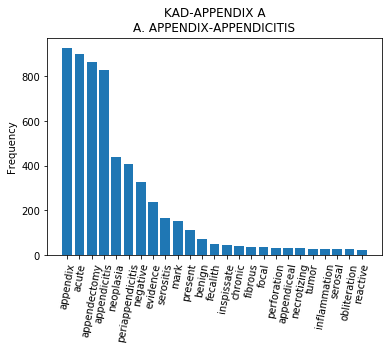



KAD-BRST NBX
A. BREAST - NEEDLE CORE BIOPSY 

breast                 1671
biopsy                 1354
core                   1281
needle                  960
microcalcifications     781
score                   750
leave                   701
grade                   675
benign                  625
right                   606
ductal                  588
carcinoma               584
review                  549
case                    545
negative                542
quality                 539
part                    539
assurance               539
another                 539
gestalt                 539
member                  538
program                 537
change                  514
tumor                   509
fibrocystic             441
dtype: int64


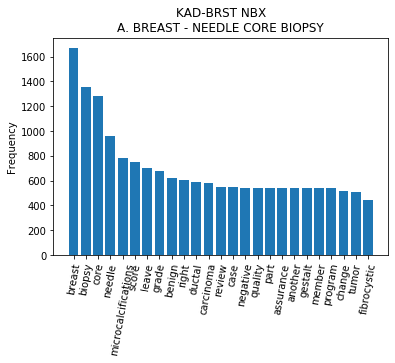



KAD-CECUM BX
A. CECAL BIOPSY 

adenoma         736
biopsy          711
polyp           661
tubular         601
colon           582
dysplasia       438
malignancy      399
cecum           396
evidence        336
fragment        330
grade           302
high            301
colonic         240
mucosa          236
hyperplastic    222
cecal           220
multiple        201
negative        199
cm              146
show            137
piece           121
colitis         101
ascend           85
active           76
granuloma        70
dtype: int64


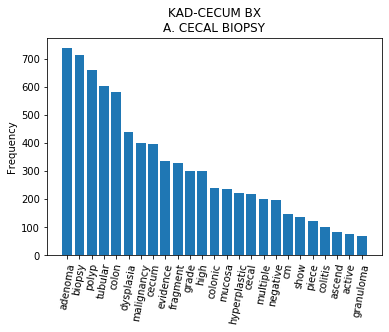



KAD-COL ASC BX
A. ASCENDING COLON BIOPSY 

colon           1166
biopsy           981
adenoma          973
ascend           867
tubular          829
polyp            772
dysplasia        590
malignancy       540
fragment         463
evidence         461
grade            426
high             425
mucosa           347
colonic          338
hyperplastic     295
multiple         281
negative         279
show             193
piece            181
colitis          168
active           129
granuloma        109
right            103
random           101
cm                96
dtype: int64


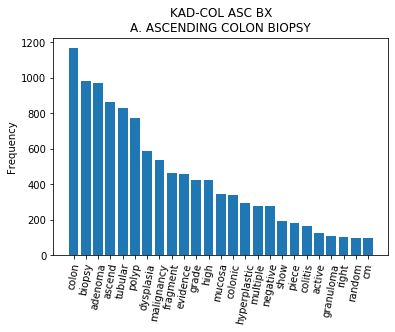



KAD-COL BX
A. COLON BIOPSY / POLYP 

colon           757
polyp           716
adenoma         609
biopsy          558
tubular         545
cm              441
dysplasia       342
malignancy      300
fragment        294
evidence        269
grade           249
high            247
hyperplastic    195
colonic         186
mucosa          186
multiple        162
negative        147
show            123
piece           108
colitis          82
active           62
granuloma        56
70               51
one              49
65               46
dtype: int64


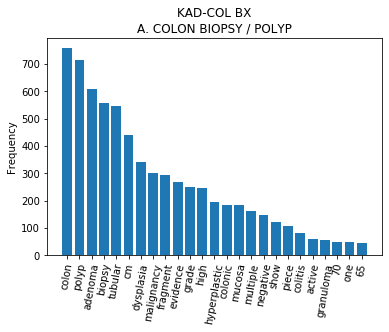



KAD-DUO BX
A. DUODENAL BIOPSY 

biopsy          1716
negative        1022
duodenum         870
mucosa           717
inflammation     589
active           448
dysplasia        386
chronic          369
villous          367
acute            359
blunt            358
significant      350
unremarkable     345
benign           327
abnormality      282
duodenitis       278
gastric          272
vascular         267
congestion       267
stomach          267
gland            264
pathologic       260
granuloma        259
colon            246
mild             245
dtype: int64


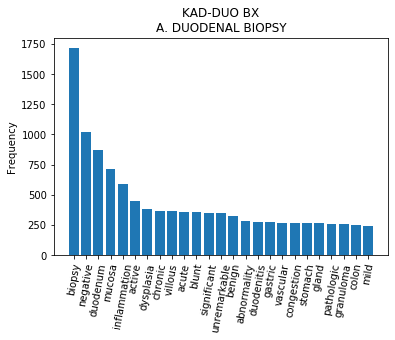



KAD-EM BX
A. ENDOMETRIAL BIOPSY / POLYP 

endometrium      2317
polyp             937
biopsy            890
atypia            773
benign            765
proliferative     713
negative          580
without           494
endometrial       481
fragment          478
malignancy        473
hyperplasia       429
phase             327
stromal           297
secretory         244
metaplasia        223
obvious           221
endocervical      209
tubal             206
focal             192
mucosa            188
weakly            185
glandular         182
change            174
breakdown         156
dtype: int64


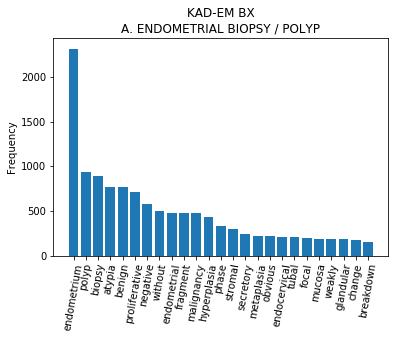



KAD-EMC
A. ENDOMETRIAL CURETTINGS 

endometrium      1087
polyp             434
benign            406
atypia            364
proliferative     333
negative          324
endometrial       312
fragment          301
curettage         268
without           256
malignancy        254
hyperplasia       208
stromal           203
curettings        192
phase             149
mucosa            136
glandular         128
secretory         127
change            124
endocervical      121
prominent         119
present           118
feature            99
blood              99
vessel             97
dtype: int64


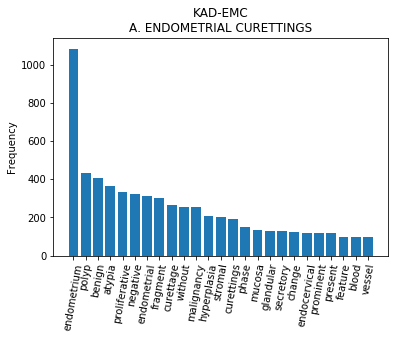



KAD-GASTRIC BX
A. GASTRIC- BIOPSY 

biopsy          1594
negative        1020
stomach          832
gastric          798
mucosa           707
benign           490
inflammation     490
congestion       469
chronic          459
vascular         452
mild             409
dysplasia        366
gastritis        346
acute            322
metaplasia       306
polyp            271
esophagus        267
pylorus          244
gastropathy      229
malignancy       229
helicobacter     215
focal            208
chemical         207
stain            207
abnormality      204
dtype: int64


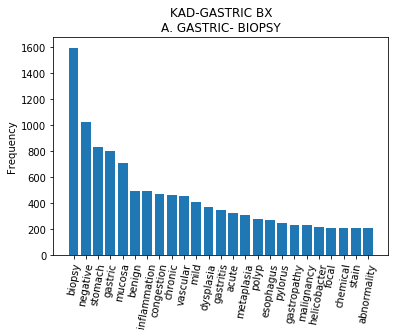



KAD-GB
A. GALLBLADDER 

gallbladder          1628
cholecystectomy      1601
chronic              1562
cholecystitis        1536
cholelithiasis       1257
neoplasia             795
evidence              767
cholesterolosis       413
present               252
sinus                 233
rokitanskyaschoff     227
node                  225
lymph                 225
benign                176
duct                  146
acute                 144
cystic                139
mild                  117
negative               74
pericystic             73
reactive               65
wall                   60
muscular               53
thin                   52
dyskinesia             51
dtype: int64


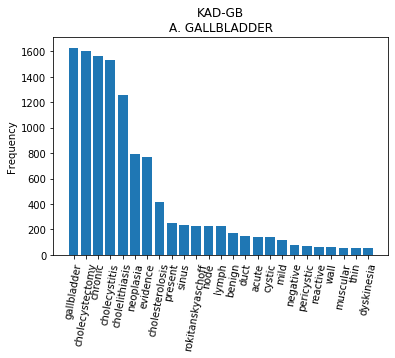



KAD-PLAC 3T
A. PLACENTA - MICRO 3T 

cord             2928
umbilical        2907
fetal            2895
membrane         2894
age              2851
gestational      2850
placenta         2248
pathologic       2240
abnormality      2211
evidence         1970
placental        1657
gram             1480
chorionic        1446
percentile       1440
weight           1439
villus           1435
maturation       1424
appropriate      1398
vessel           1388
approximately    1371
three            1364
infectious       1165
process          1165
inflammatory     1160
trophoblastic     798
dtype: int64


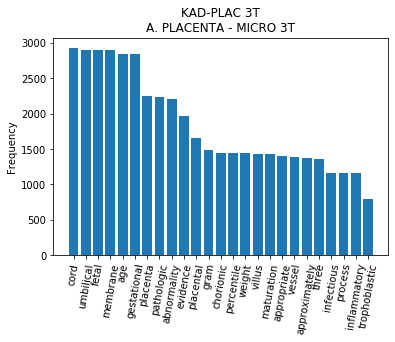



KAD-PLAC 3T GRS
A. PLACENTA GROSS ONLY 

placenta        4722
cord            4719
trivascular     4712
term            4711
grossly         4711
describe        4710
gram            3742
umbilical       1856
tube             322
fallopian        322
section          112
pathologic       106
cross             94
complete          89
identify          85
leave             81
right             79
abnormality       74
full              62
diagnosis         56
without           56
ligation          55
tubal             55
crosssection      54
segment           52
dtype: int64


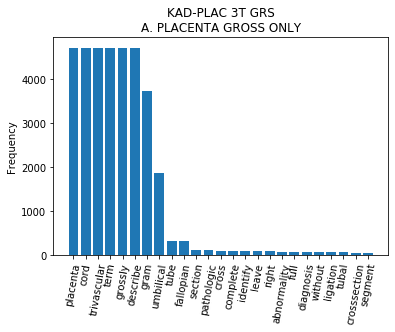



KAD-RECTAL BX
A. RECTAL BIOPSY / POLYPO 

polyp             507
biopsy            382
rectal            319
adenoma           282
rectum            253
hyperplastic      243
malignancy        177
tubular           173
negative          153
dysplasia         152
mucosa            126
fragment          104
evidence           94
grade              87
colonic            84
high               79
comment            47
show               47
piece              39
multiple           37
adenocarcinoma     35
invasive           33
tumor              31
highgrade          29
tubulovillous      28
dtype: int64


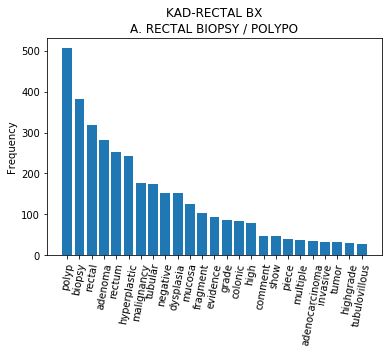



KAD-SK BX <1CM
A. SKIN BX <1 CM 

skin                  3343
biopsy                2821
leave                 1293
right                 1266
shave                 1218
carcinoma             1146
present               1068
cell                   848
edge                   846
case                   774
review                 773
dictate                769
dermatopathologist     747
nevus                  730
boardcertified         707
keratosis              657
md                     636
basal                  612
comment                605
margin                 591
christopher            557
rozelle                557
melanocytic            548
lesion                 540
benign                 533
dtype: int64


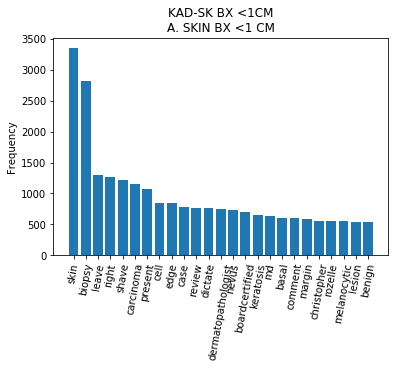



KAD-SK BX1
A. SKIN BIOPSY 

skin                  1603
biopsy                 842
carcinoma              740
excision               652
cell                   628
leave                  615
margin                 595
right                  527
residual               508
present                487
review                 436
case                   436
dictate                431
dermatopathologist     420
basal                  414
md                     400
boardcertified         395
rozelle                361
christopher            360
change                 334
site                   306
squamous               249
surgical               243
negative               221
cyst                   221
dtype: int64


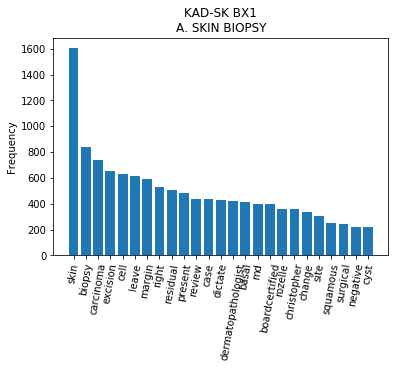



KAD-SOFT NOS
A. SOFT TISSUE - NOS 

tissue          686
mass            513
excision        476
right           338
benign          313
leave           305
cyst            234
consistent      234
inflammation    219
mesh            211
soft            209
lipoma          192
negative        186
feature         161
without         145
adipose         140
skin            135
finger          132
atypical        129
foreign         119
body            101
cell            100
dense            92
mature           90
chronic          88
dtype: int64


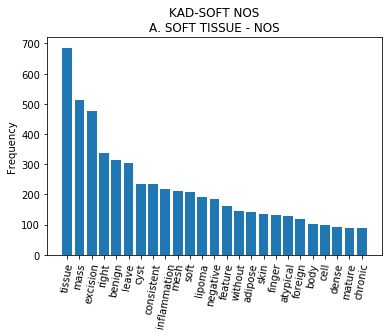



KAD-STONE RENAL
A. RENAL STONE 

facility      731
outside       731
chemical      731
calculus      731
specimen      730
send          730
identify      730
analysis      728
ab              7
leave           4
papillary       3
urothelial      3
comment         2
pathologic      2
bladder         2
trigone         2
apt3nt          2
negative        2
biopsy          2
carcinoma       2
gross           2
tumor           2
stone           2
uterus          2
nm3lysis        2
dtype: int64


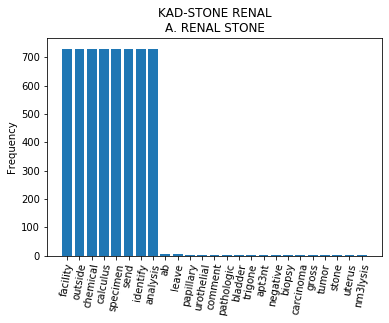



KAD-UT OV
A. UTERUS, TUBES & OVARY 

tube             1307
fallopian        1272
benign            981
bilateral         863
endometrium       863
uterus            778
cyst              624
gram              497
cervix            457
hysterectomy      453
proliferative     432
salpingectomy     430
atypia            406
pathologic        366
leiomyoma         343
abnormality       333
without           328
nabothian         325
myometrium        304
serosa            291
negative          273
adenomyosis       250
chronic           240
polyp             233
cm                232
dtype: int64


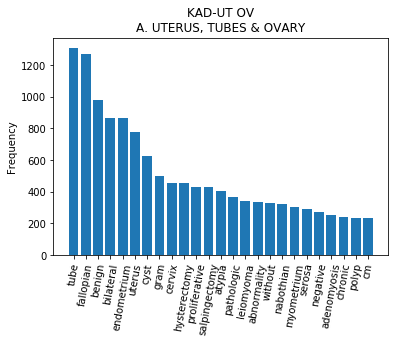



KIDST
A. KIDNEY STONE 

stone          1234
calculus        684
analysis        648
kidney          401
pending         326
material        321
present         311
gross           245
calcium         225
oxalate         197
addendum        181
leave           168
right           141
submit          127
result          125
issue           122
nidus           120
cm              116
paml            116
composition     115
weight          106
monohydrate     101
dihydrate        99
observe          88
perform          87
dtype: int64


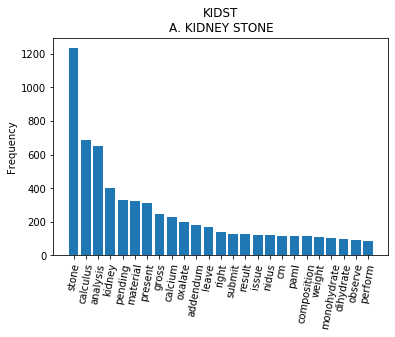



LABIA
A. LABIAL BIOPSY 

biopsy                600
labium                550
skin                  296
right                 262
leave                 260
dysplasia             245
negative              188
squamous              183
benign                168
comment               166
malignancy            146
inflammation          134
chronic               133
lichen                133
sclerosus             123
majora                122
change                106
labial                105
case                   99
review                 99
dictate                94
mild                   93
minora                 86
md                     82
dermatopathologist     80
dtype: int64


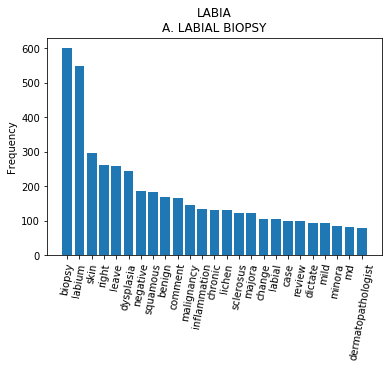



LIP-BX
A. LIP BIOPSY 

report            1356
icd10              905
lip                782
code               745
information        678
internal           678
provide            678
lower              647
additional         341
base               340
may                340
within             340
procedure          340
include            340
intend             339
adjustment         339
courtesy           339
sole               339
adjust             339
substitute         339
convey             339
recipient          339
responsibility     339
release            339
office             339
dtype: int64


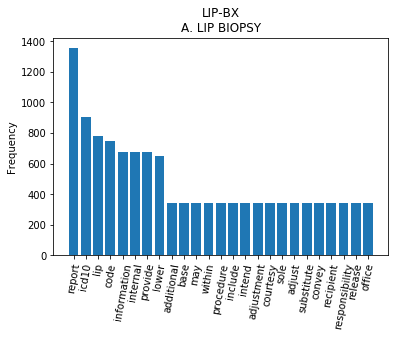



LIPOMA
A. LIPOMA 

tissue                1419
lipoma                1231
soft                   791
excision               780
consistent             581
right                  539
leave                  537
benign                 504
mature                 403
adipose                386
back                   274
review                 243
case                   241
dictate                239
dermatopathologist     210
md                     209
boardcertified         197
fibroadipose           150
angiolipoma            148
upper                  143
herreid                139
peter                  139
arm                    123
mass                   123
forearm                123
dtype: int64


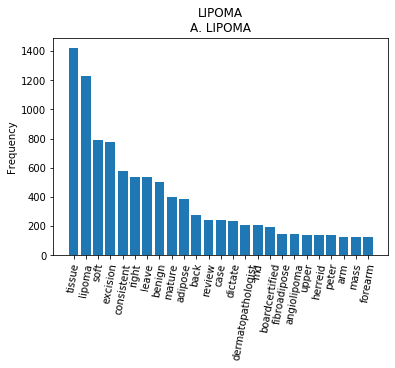



LIV-NBX
A. LIVER NEEDLE BIOPSY 

liver              768
biopsy             659
fibrosis           628
stage              562
grade              557
needle             459
hepatitis          458
score              414
activity           408
mild               386
chronic            350
metavir            292
battsludwig        248
portal             240
steatosis          240
core               228
negative           216
comment            208
moderate           177
system             175
inflammation       173
brunt              161
steatohepatitis    146
periportal         133
bridge             109
dtype: int64


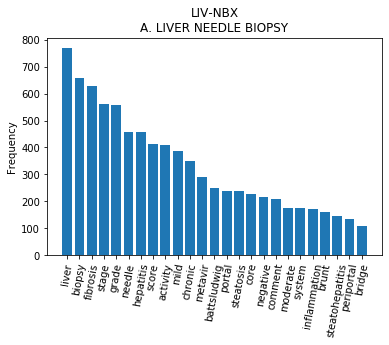



LYM-BX
A. LYMPH NODE BIOPSY 

node          1650
lymph         1574
tumor          544
biopsy         469
leave          465
benign         457
negative       449
carcinoma      439
right          424
comment        344
margin         317
metastatic     283
tissue         233
excision       216
identify       211
invasion       198
grade          194
cm             180
one            178
present        163
station        162
histologic     160
lymphoma       159
core           159
invasive       158
dtype: int64


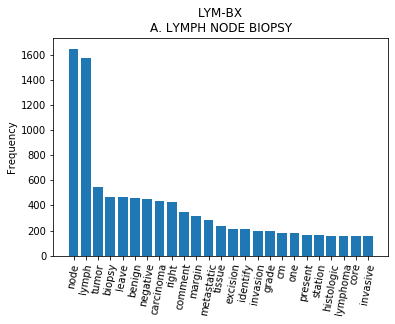



NAIL-PAF
A. FINGERNAIL/TOENAIL W/ PAS STAIN FOR FUNGUS 

nail                  925
stain                 669
pa                    537
fungal                474
onychomycosis         452
toe                   451
identify              449
review                424
dictate               424
case                  424
md                    422
dermatopathologist    422
ancillary             411
segment               400
right                 395
leave                 383
boardcertified        355
herreid               323
peter                 323
first                 289
clip                  283
toenail               277
comment               267
bacterial             248
routine               206
dtype: int64


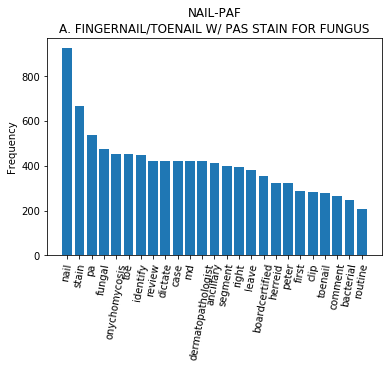



OE-COL-P
A. COLON POLYP 

polyp           5723
colon           3413
adenoma         2482
tubular         2357
polypectomy     2248
hyperplastic    1609
biopsy          1535
fragment        1459
transverse      1284
sigmoid         1191
endoscopic      1181
ascend          1083
mucosa           797
colonic          751
rectal           558
descend          463
serrate          413
sessile          401
one              390
cecum            376
rectum           335
cecal            312
change           304
diagnostic       279
separate         279
dtype: int64


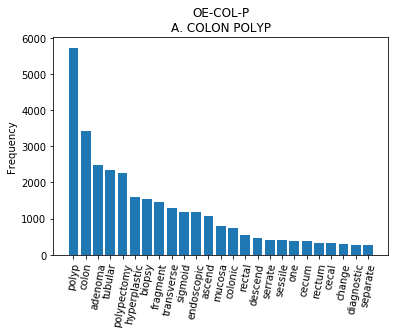



OE-DUOBX
A. DUODENAL BIOPSY 

biopsy          1597
mucosa          1370
negative         709
dysplasia        586
diagnostic       559
mild             520
gastric          517
duodenal         516
chronic          513
duodenum         502
endoscopic       461
abnormality      411
pylorus          410
polyp            365
metaplasia       349
identify         345
inflammation     341
stomach          319
squamous         306
colon            281
change           277
fragment         273
cell             263
gastritis        261
antrum           256
dtype: int64


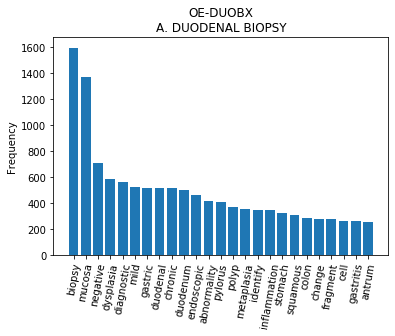



OE-STOMBX
A. STOMACH, BIOPSY 

biopsy              1809
mucosa              1566
negative            1502
gastric             1197
dysplasia           1166
pylorus              988
mild                 916
chronic              909
metaplasia           815
stomach              689
inflammation         617
endoscopic           615
gastritis            605
polyp                601
antrum               591
helicobacter         564
squamous             556
body                 538
cell                 518
identify             517
goblet               496
reactive             484
gastroesophageal     481
antral               468
change               443
dtype: int64


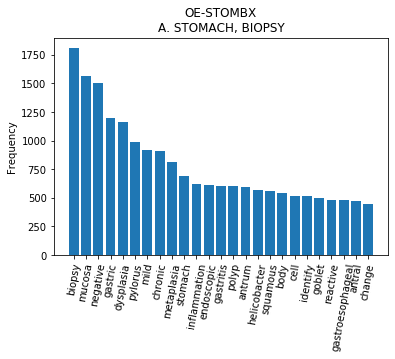



ORAL
A. ORAL MUCOSAL BIOPSY 

report         6024
icd10          3983
code           3236
provide        3012
information    3012
internal       3012
base           1514
procedure      1511
within         1510
submit         1510
additional     1510
leave          1508
receive        1508
include        1508
may            1507
intend         1507
sole           1506
office         1506
valid          1506
selection      1506
convey         1506
contain        1506
release        1506
audit          1506
cod            1506
dtype: int64


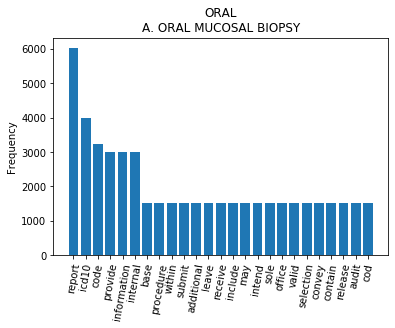



ORALS
A. ORAL MANDIBULAR BODY 

report            3953
icd10             2952
code              2140
provide           1976
internal          1976
information       1976
base               996
procedure          992
within             991
additional         989
submit             989
include            989
appropriate        988
convey             988
office             988
audit              988
contain            988
cod                988
intend             988
valid              988
receive            988
accurate           988
may                988
substitute         987
responsibility     987
dtype: int64


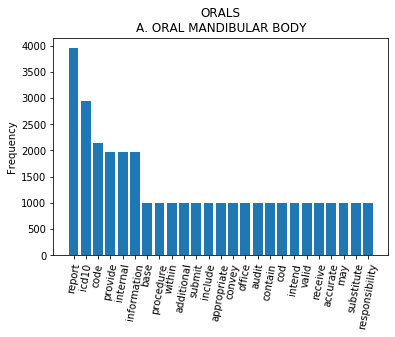



PLAC
A. PLACENTA, 3RD TRIMESTER 

placenta          2806
umbilical         2022
cord              2001
mild              1730
acute             1468
change            1201
show              1190
chorionic         1085
inflammatory      1076
placental         1028
trivascular       1023
villous           1018
fetal              920
maturation         885
membrane           862
villus             839
term               830
meconium           805
deposition         760
gram               685
interpretation     683
moderate           679
inflammation       661
trimester          600
third              590
dtype: int64


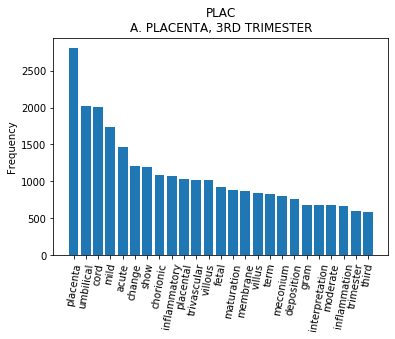



POC-S
A. PRODUCTS OF CONCEPTION, SPONTANEOUS/MISSED ABORTION 

product         1479
conception      1478
villus           896
chorionic        795
uterine          687
tissue           607
content          599
identify         541
decidua          492
immature         435
consistent       417
endometrium      364
change           311
fetal            272
fragment         266
decidualized     256
degenerate       221
placental        177
present          160
blood            153
somatic          130
comment          116
necrotic         109
site             108
negative         108
dtype: int64


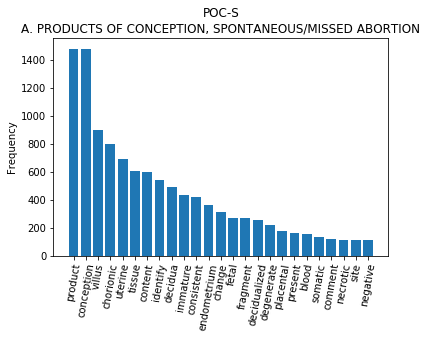



PROS6-BX
F. RIGHT APEX PROSTATE BIOPSY 

prostatic         5329
tumor             5263
tissue            4532
benign            3483
leave             2951
right             2951
core              2495
prostate          2365
base              1968
apex              1965
mid               1963
adenocarcinoma    1750
invasion          1567
perineural        1527
gleason           1492
involve           1442
score             1423
present           1406
quantitation      1402
identify          1296
biopsy            1280
longest           1257
confluent         1251
mm                1221
needle            1185
dtype: int64


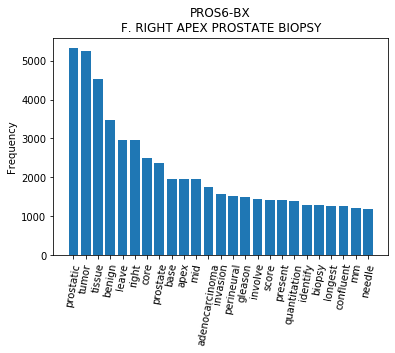



PROS6-BX:DUDBCZSPMKMZTYWDG-QBAQ
PROS6-BX,PROS6-BX,PROS6-BX,PROS6-BX,PROS6-BX,PROS6-BX 

tumor             8892
prostatic         8784
tissue            6733
benign            4720
right             4278
leave             4269
core              3911
grade             2947
base              2859
mid               2853
apex              2847
present           2681
prostate          2595
adenocarcinoma    2572
group             2488
invasion          2446
score             2396
gleason           2315
involve           2300
perineural        2296
quantitation      2233
mm                2189
confluent         2134
longest           2112
identify          1978
dtype: int64


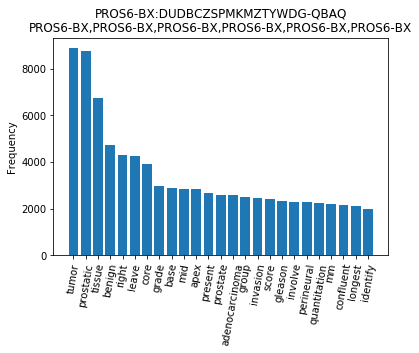



REC
A. RECTUM 

biopsy            693
rectum            471
negative          404
mucosa            334
dysplasia         314
rectal            230
polyp             209
hyperplastic      202
fragment          191
chronic           185
colon             180
colitis           173
colonic           166
malignancy        155
benign            150
change            139
active            119
adenoma           117
comment           105
granuloma          94
acute              84
inflammation       84
adenocarcinoma     78
focal              78
mass               76
dtype: int64


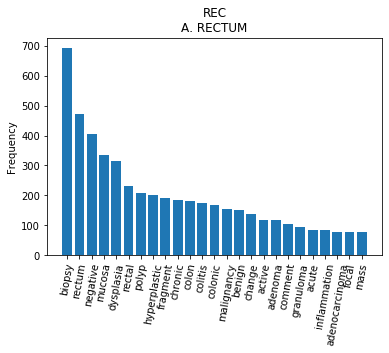



RECT-P
A. RECTAL POLYP 

polyp                4415
hyperplastic         1981
rectal               1681
biopsy               1479
polypectomy          1471
adenoma              1210
rectum               1031
fragment              981
tubular               892
colon                 875
dysplasia             585
negative              562
case                  438
review                438
dictate               436
md                    413
pathologist           361
fellowshiptrained     359
isaac                 359
gastrointestinal      358
grindeland            358
mucosa                356
benign                353
malignancy            343
colonic               230
dtype: int64


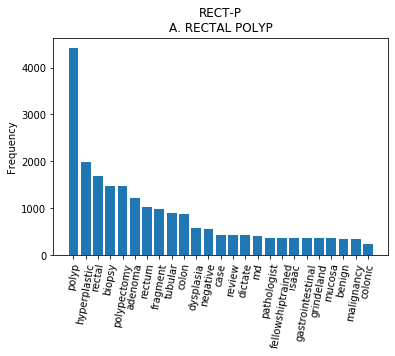



SBRSTNBX
A. STEREOTACTIC BREAST NEEDLE BIOPSY 

breast                 2031
biopsy                 1263
microcalcifications    1184
core                    897
benign                  879
change                  846
needle                  713
ductal                  684
right                   671
leave                   648
atypia                  635
tumor                   628
carcinoma               600
identify                595
stereotactic            583
negative                575
tissue                  553
present                 553
oclock                  534
focal                   513
grade                   505
fibrocystic             479
hyperplasia             474
stromal                 369
receptor                365
dtype: int64


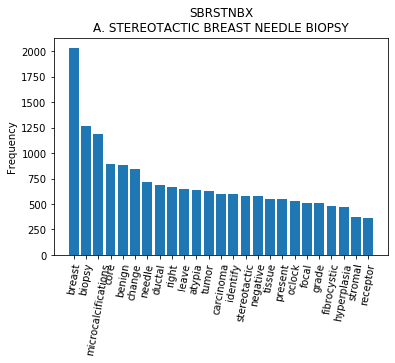



SE-COL-P
A. COLON POLYP 

polyp           3766
colon           2801
adenoma         2248
polypectomy     2216
tubular         1812
fragment        1789
ascend          1072
transverse       982
hyperplastic     777
mucosa           764
colonic          751
sigmoid          714
descend          684
cecum            590
serrate          408
sessile          400
flexure          301
negative         292
benign           278
rectum           256
dysplasia        232
normal           196
polypoid         193
hepatic          190
lymphoid         190
dtype: int64


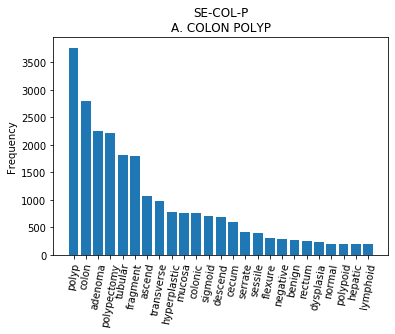



SIG-P
A. SIGMOID POLYP 

polyp                4761
sigmoid              3245
colon                3182
adenoma              1947
biopsy               1925
hyperplastic         1897
polypectomy          1706
tubular              1589
fragment             1243
dysplasia             813
negative              760
mucosa                581
colonic               527
benign                505
malignancy            435
review                413
case                  413
dictate               412
md                    378
highgrade             345
cm                    308
fellowshiptrained     290
pathologist           290
isaac                 289
grindeland            289
dtype: int64


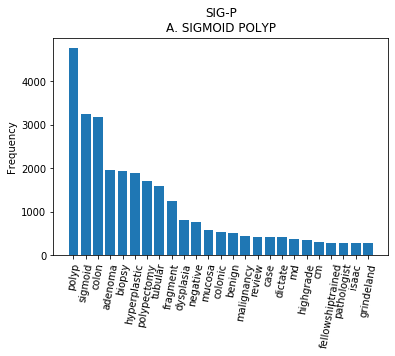



SINUS
A. SINUS CONTENTS 

sinus           1352
chronic         1119
bone             972
benign           900
content          899
fragment         874
mucosa           862
leave            716
respiratory      697
sinusitis        688
right            677
tissue           457
inflammation     428
maxillary        336
negative         321
malignancy       313
inflammatory     310
ethmoid          278
upper            271
inflame          262
sinonasal        240
eosinophil       230
polyp            223
biopsy           201
nasal            198
dtype: int64


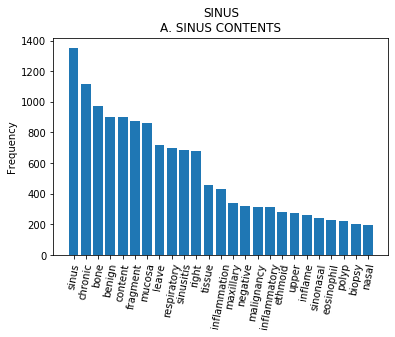



SK-AD
A. SKIN FOR DERM,OTHER THAN SKC1D 

skin                  1277
biopsy                1271
shave                  964
margin                 816
dermatopathologist     730
review                 730
case                   730
dictate                729
right                  604
leave                  560
lateral                558
nevus                  535
boardcertified         468
webb                   468
alden                  468
present                466
comment                287
compound               286
melanocytic            267
certify                262
phd                    262
board                  262
mancong                262
md                     262
zhang                  262
dtype: int64


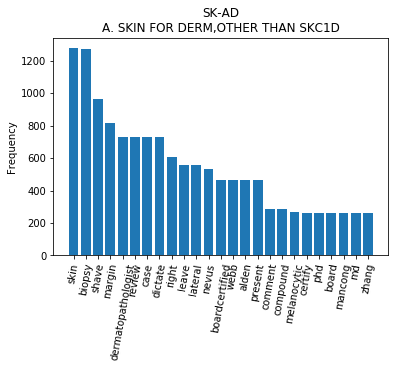



SK-DS
A. SKIN FOR DERM,OTHER THAN SKC1D 

skin                  1386
biopsy                1316
punch                  715
comment                706
leave                  667
right                  631
shave                  543
review                 481
case                   480
dermatopathologist     478
dictate                477
margin                 463
lateral                441
dermatitis             364
boardcertified         297
alden                  292
webb                   292
present                291
upper                  266
nevus                  255
back                   239
spongiotic             215
superior               209
proximal               199
md                     187
dtype: int64


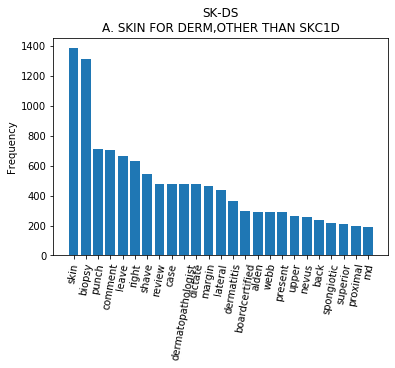



SK-EWD
A. SKIN FOR DERM,OTHER THAN SKC1D 

biopsy                2603
skin                  1551
shave                 1289
edge                  1098
present               1057
review                 749
dictate                749
dermatopathologist     748
case                   747
boardcertified         727
md                     702
rozelle                682
christopher            682
leave                  682
cell                   657
carcinoma              655
right                  649
superficial            541
deep                   505
comment                488
squamous               439
basal                  421
upper                  381
keratosis              279
nodular                262
dtype: int64


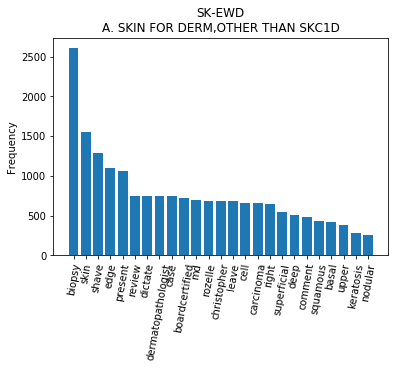



SK-NWD
A. SKIN FOR DERM,OTHER THAN SKC1D 

skin                  6581
biopsy                6572
shave                 5888
case                  4543
review                4542
dermatopathologist    4538
dictate               4533
margin                3746
boardcertified        3382
alden                 3377
webb                  3374
leave                 3049
present               3024
right                 2871
lateral               2633
cell                  2012
carcinoma             1977
deep                  1931
keratosis             1764
nevus                 1489
upper                 1329
basal                 1317
type                  1281
md                    1165
phd                   1154
dtype: int64


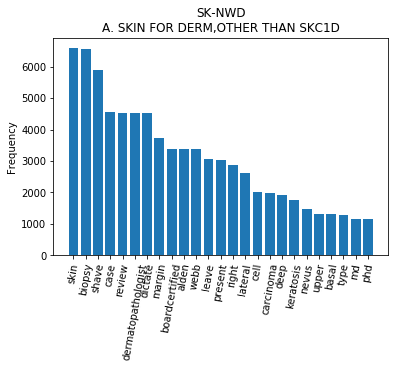



SK-VD
A. SKIN FOR DERM, OTHER THAN SKC1D 

biopsy                4524
skin                  4467
shave                 3748
case                  3091
review                3089
dermatopathologist    3084
dictate               3080
margin                2311
boardcertified        2145
lateral               2139
webb                  2132
alden                 2132
right                 2065
leave                 2063
present               2014
deep                  1347
nevus                 1127
cell                  1125
carcinoma             1098
keratosis             1031
md                     957
zhang                  943
board                  942
phd                    942
certify                942
dtype: int64


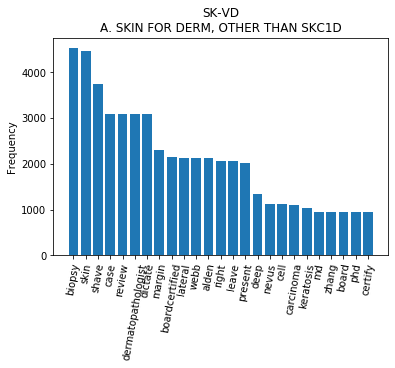



SKC1
A. CYST/TAG/DEBRIDMENT 

skin                  2503
cyst                  1831
review                1458
case                  1454
dictate               1451
dermatopathologist    1410
excision              1329
boardcertified        1232
leave                 1168
right                 1128
biopsy                1119
md                    1049
benign                 734
epidermal              692
inclusion              678
herreid                524
peter                  521
tissue                 464
back                   417
shave                  408
alden                  393
webb                   392
rupture                356
neck                   345
comment                332
dtype: int64


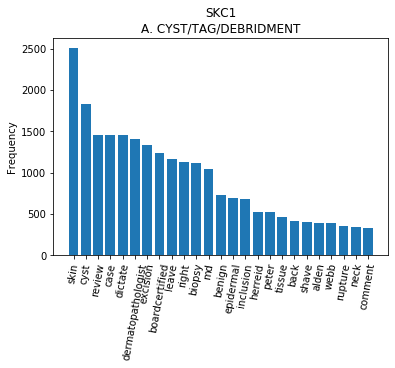



SKD1
A. SKIN FOR DERM,OTHER THAN SKC1D 

biopsy                1361
skin                  1064
shave                  693
dermatopathologist     466
dictate                466
case                   466
review                 466
leave                  454
right                  426
boardcertified         420
edge                   376
carcinoma              302
present                299
cell                   296
md                     295
keratosis              292
comment                276
rozelle                249
christopher            245
punch                  244
squamous               206
margin                 200
absent                 186
webb                   171
alden                  171
dtype: int64


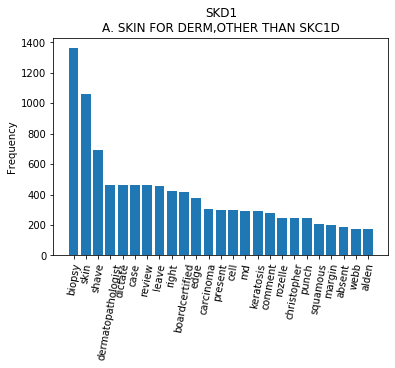



SKO1
A. SKIN, OTHER THAN SKC1 

skin                  51418
biopsy                43301
shave                 24907
review                23643
case                  23626
dictate               23496
dermatopathologist    22985
leave                 22630
right                 21678
boardcertified        19951
md                    16417
margin                15149
carcinoma             14147
cell                  13793
keratosis             13610
present               13412
nevus                 11517
punch                  9547
lateral                9218
comment                8906
basal                  8769
seborrheic             7676
herreid                7598
peter                  7581
benign                 7409
dtype: int64


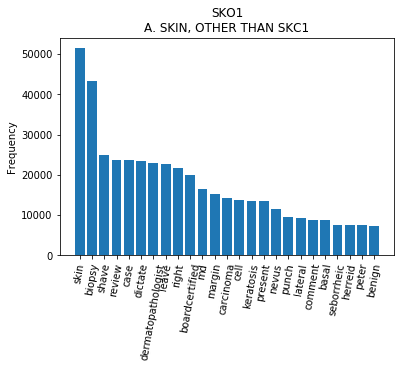



SKO1:U3COANHU2-BTXRC9W.DX3G
SKO1,SKO1,SKO1 

skin                  2099
biopsy                1908
shave                 1480
leave                  939
right                  933
present                793
carcinoma              755
cell                   719
margin                 663
keratosis              572
nevus                  572
lateral                505
basal                  491
review                 439
case                   438
dictate                438
dermatopathologist     432
boardcertified         376
deep                   322
back                   316
md                     304
upper                  295
squamous               288
melanocytic            283
seborrheic             267
dtype: int64


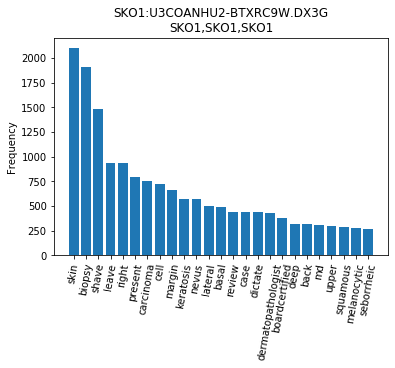



SKO1:YQ7GCLSI5MRLZOQC7UV3DA
SKO1,SKO1(3) 

skin                  5667
biopsy                5088
shave                 3386
leave                 2479
right                 2371
present               1872
carcinoma             1739
cell                  1695
review                1683
case                  1680
dictate               1671
dermatopathologist    1644
margin                1640
keratosis             1445
boardcertified        1444
nevus                 1429
lateral               1177
basal                 1135
md                    1133
punch                 1037
comment                852
back                   836
deep                   824
upper                  746
seborrheic             744
dtype: int64


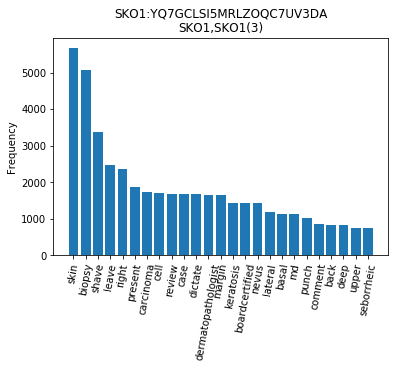



SKO2
A. SKIN, OTHER THAN CYST/TAG/DEBRIDEMENT/PLASTIC REPAIR - 2 BLOCKS 

skin                  4163
excision              3256
margin                2688
carcinoma             2444
cell                  2248
leave                 1879
residual              1862
biopsy                1816
right                 1715
review                1496
case                  1496
dictate               1491
dermatopathologist    1452
basal                 1397
change                1253
md                    1219
site                  1187
boardcertified        1055
negative              1004
lateral                920
squamous               901
present                731
mm                     661
absent                 629
previous               584
dtype: int64


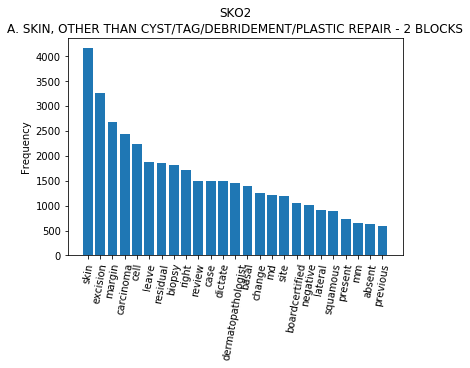



SKO3
A. SKIN, OTHER THAN CYST/TAG/DEBRIDEMENT/PLASTIC REPAIR - 3 BLOCKS 

skin                  804
excision              640
margin                516
carcinoma             512
cell                  452
residual              379
leave                 362
right                 343
review                327
case                  327
dictate               325
dermatopathologist    320
md                    303
biopsy                296
basal                 279
boardcertified        274
change                244
site                  215
squamous              176
melanoma              161
negative              161
back                  157
identify              149
peter                 148
herreid               148
dtype: int64


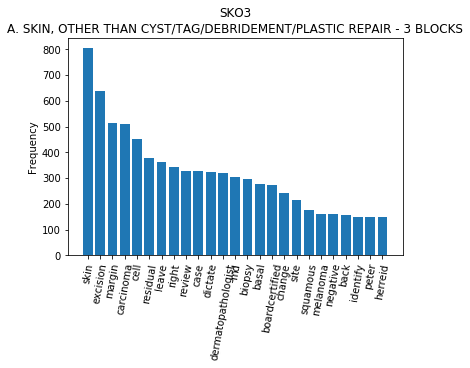



SKO4
A. SKIN, OTHER THAN CYST/TAG/DEBRIDEMENT/PLASTIC REPAIR - 4 BLOCKS(6) 

skin                  687
excision              549
margin                468
carcinoma             359
melanoma              347
residual              338
cell                  314
right                 314
leave                 309
identify              265
review                256
case                  251
dictate               250
dermatopathologist    248
md                    238
boardcertified        233
biopsy                208
comment               188
change                183
basal                 182
back                  153
tumor                 150
herreid               146
peter                 146
situ                  143
dtype: int64


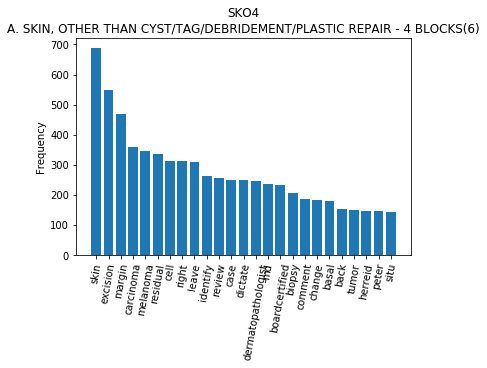



SMB-BX
A. SMALL BOWEL BIOPSY 

biopsy          1989
negative        1829
mucosa          1215
dysplasia       1094
colon            895
malignancy       744
colitis          662
ileum            630
bowel            619
small            547
terminal         547
chronic          537
active           521
abnormality      509
granuloma        508
colonic          505
diagnostic       493
benign           449
ileitis          361
inflammation     361
change           302
polyp            275
fragment         266
normal           254
random           252
dtype: int64


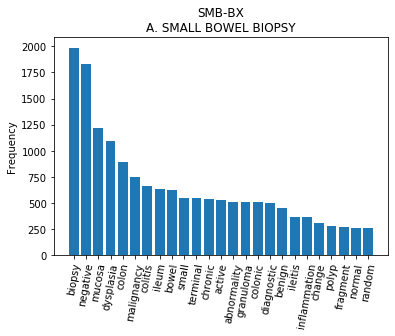



SOFT
A. SOFT TISSUE, NOS 

tissue                1683
excision              1343
right                 1092
leave                 1005
benign                 926
soft                   822
mass                   693
biopsy                 585
cyst                   556
skin                   525
consistent             523
negative               432
lipoma                 419
inflammation           370
comment                367
malignancy             362
review                 332
case                   329
dictate                327
chronic                269
dermatopathologist     254
md                     241
finger                 240
foot                   233
cell                   225
dtype: int64


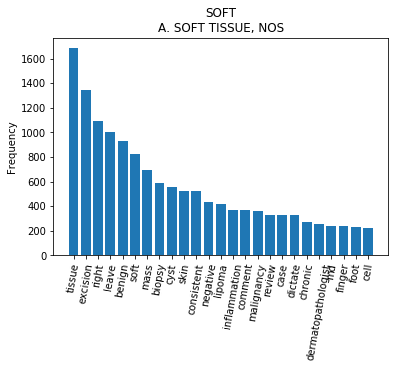



SOFT-O
A. SOFT TISSUE, OTHER THAN TUMOR/MASS/LIPOMA/DEBRIDE(2) 

tissue                1319
leave                  818
right                  812
soft                   788
benign                 608
excision               465
review                 444
case                   443
dictate                439
md                     432
dermatopathologist     421
boardcertified         416
comment                396
biopsy                 389
lipoma                 383
mass                   335
skin                   327
herreid                326
peter                  323
tumor                  281
consistent             273
inflammation           258
negative               252
malignancy             252
cyst                   236
dtype: int64


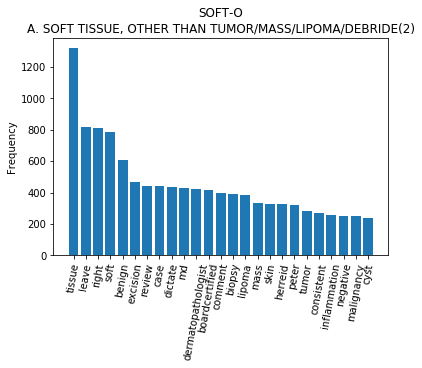



STOMBX
A. STOMACH BIOPSY 

biopsy          1561
negative        1547
mucosa          1306
gastric          974
metaplasia       971
stomach          955
intestinal       832
pylorus          754
dysplasia        694
chronic          627
reactive         427
inflammation     413
mild             392
gastritis        389
body             358
random           358
helicobacter     348
benign           279
oxyntictype      256
organism         244
polyp            239
stain            234
squamous         225
esophagus        221
type             214
dtype: int64


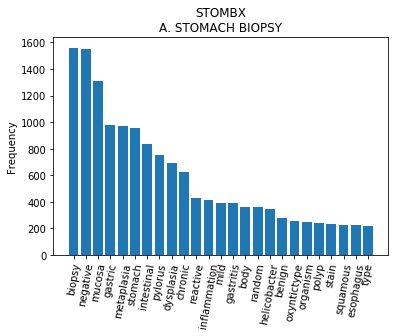



TONG-BX
A. TONGUE BIOPSY(2) 

tongue         1133
report          884
icd10           589
code            481
right           464
leave           443
internal        440
lateral         440
provide         440
information     440
squamous        397
base            313
fibroma         288
biopsy          283
dysplasia       264
submit          234
procedure       228
within          227
additional      225
receive         224
include         222
may             221
appropriate     220
office          220
selection       220
dtype: int64


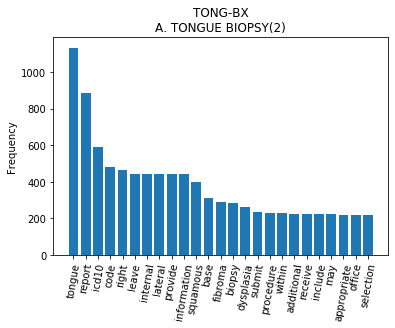



TONS1
A. TONSILS (LEFT TONSUL WITH TIE) AND ADENOIDS RECD IN ONE CONTAINER 

tonsil           1132
hyperplasia       843
tonsillectomy     730
bilateral         615
lymphoid          536
benign            509
follicular        453
right             417
leave             364
reactive          241
actinomyces       172
tissue            168
tonsillar         160
tonsillitis       159
acute             156
inflammation      133
chronic           125
palatine          121
negative          114
consistent        103
malignancy        103
mild               97
actinomycotic      93
granule            93
sulfur             93
dtype: int64


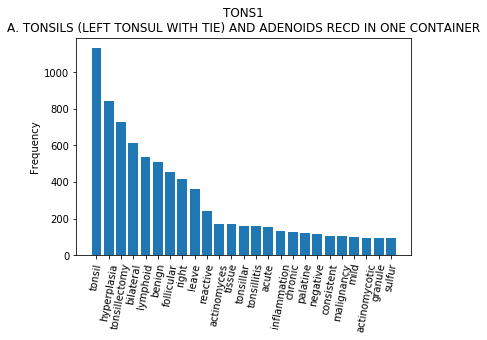



TONSB
A. BILATERAL TONSILS 

tonsil           1157
hyperplasia       988
bilateral         832
tonsillectomy     771
benign            696
lymphoid          532
right             528
leave             526
reactive          276
actinomyces       239
present           216
chronic           207
tissue            203
tonsillar         187
inflammation      145
acute             135
follicular        133
malignancy        122
change            102
tonsillitis        95
palatine           91
atypia             86
note               80
negative           77
mild               76
dtype: int64


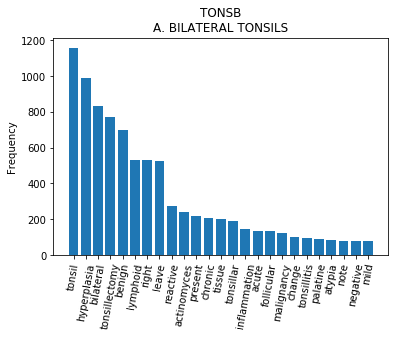



URINBL-BX
A. URINARY BLADDER BIOPSY(2) 

bladder         1574
biopsy          1324
urothelial       921
chronic          565
carcinoma        544
identify         507
cystitis         468
grade            460
wall             440
tumor            408
negative         403
dysplasia        386
benign           385
malignancy       380
propria          375
present          369
invasion         352
papillary        332
muscularis       325
inflammation     317
urothelium       314
mucosa           280
atypia           246
posterior        241
without          237
dtype: int64


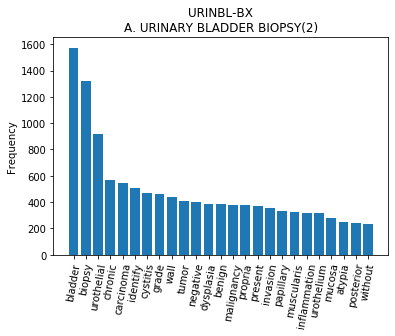



USBRSTNBX
A. ULTRASOUND GUIDED BREAST NEEDLE BIOPSY 

breast                 8034
score                  6220
biopsy                 5422
tumor                  4721
oclock                 4261
core                   3976
grade                  3919
needle                 3332
leave                  2985
ultrasoundguided       2979
right                  2861
carcinoma              2756
receptor               2720
ductal                 2211
microcalcifications    2098
identify               2091
benign                 2072
negative               2017
nuclear                2008
atypia                 1890
present                1815
absent                 1798
tissue                 1733
feature                1721
mm                     1557
dtype: int64


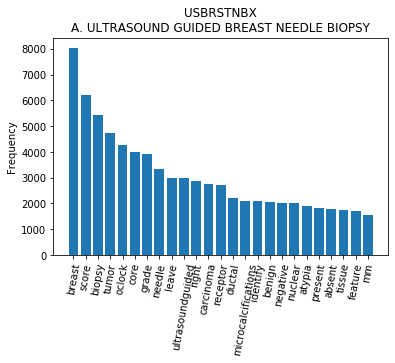



UT/TO-O
A. UTERUS, TUBES AND OVARIES, OTHER THAN FOR NEOPLASTIC/PROLAPSE 

tube             2819
benign           2546
fallopian        2430
bilateral        2358
cervix           1742
uterus           1637
endometrium      1621
ovary            1296
cyst              963
myometrium        948
hysterectomy      920
leave             774
right             750
proliferative     697
negative          682
abnormality       610
unremarkable      564
salpingectomy     558
squamous          503
diagnostic        497
leiomyoma         479
atypia            469
adenomyosis       460
change            397
hyperplasia       377
dtype: int64


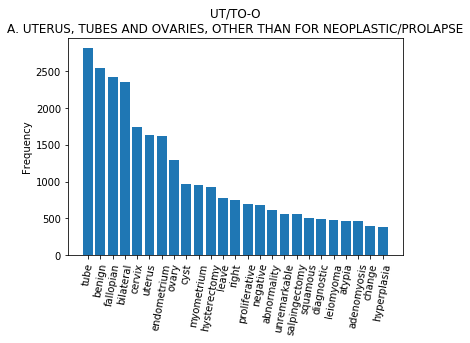



VAGBX
A. VAGINAL BIOPSY 

biopsy             614
vaginal            521
squamous           480
dysplasia          368
mucosa             266
negative           257
benign             228
malignancy         208
vagina             193
tissue             187
comment            174
mild               136
cuff               122
inflammation       122
granulation        121
atypia             118
change             107
lesion             104
intraepithelial    104
vain               100
identify            99
chronic             93
leave               89
right               88
fragment            87
dtype: int64


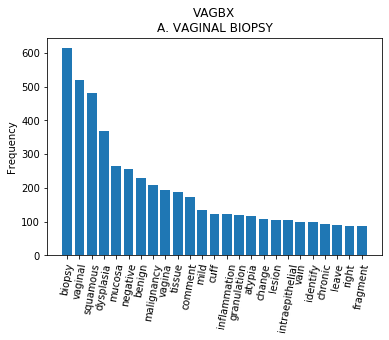



VULVBX
A. VULVAR BIOPSY 

biopsy                1401
vulva                 1014
dysplasia              671
skin                   615
squamous               496
negative               457
comment                447
vulvar                 428
malignancy             363
chronic                340
inflammation           336
lichen                 326
benign                 316
sclerosus              295
mild                   266
change                 217
right                  199
case                   197
review                 197
dictate                195
md                     184
leave                  181
identify               165
dermatopathologist     160
boardcertified         153
dtype: int64


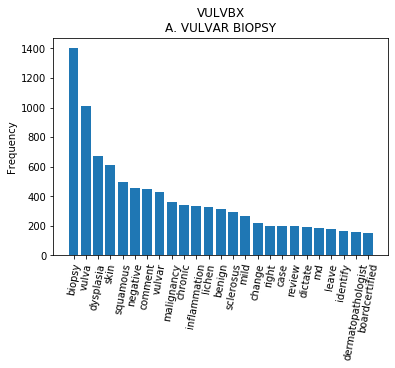

<Figure size 432x288 with 0 Axes>

In [16]:
#grab every examCode one by one and store it in label

for label in unique_labels.index:
    
    #print the examCode and its description
    print(label)
    print(descriptive_labels.description[label],'\n')
    
    #this is another reason i made the exam code the index, 
    #here i simply grab every section value with the examCode matching to the examCode stored in label
    # store it in a Pandas series datafram which keeps the coloumns and indexs from the dataFrame
    sf = data.sectionValue[label]
    
    #convert the series with only sectionValues that are for the current examCode
    #back to a pandas DataFrame object.
    temp = pd.DataFrame({'examCode':sf.index, 'sectionValue':sf.values})
    
    #get a word_index for the given examCode's sectionValues
    word_Index = generateWordIndex(temp)
    
    #generate the report for the word_index and corresponding ExamCode
    generateReport(word_Index, label)
    
    #create space to help make things stay separated
    print('\n')
    